<h3 align="center" style="font-size:40px; font-family:'Helvetica Neue', sans-serif; color: #2a9d8f; text-shadow: 2px 2px 4px #264653; letter-spacing: 1px; margin-top: 20px; margin-bottom: 20px;">
    OUTLIERS
</h3>


<h4 align="center" style="font-size:30px; font-family:'Arial', sans-serif; color: #e76f51; text-shadow: 1px 1px 3px #f4a261; letter-spacing: 0.5px; margin-top: 15px; margin-bottom: 15px; border-bottom: 2px solid #264653; padding-bottom: 5px;">
    MEDIA E DEVIAZIONE STANDARD
</h4>

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Importiamo le librerie Pandas per la gestione dei dati e Matplotlib per i grafici

# Creiamo un set di dati di esempio
data = {'Valori': [1, 2, 3, 4, 5, 10, 15, 20, 25, 300, 1000, 100000000, -50000000, -50]}
df = pd.DataFrame(data)

# Qui abbiamo creato un DataFrame che contiene i nostri dati. Molto comodo!

# Ora calcoliamo la media e la deviazione standard
mean_value = df['Valori'].mean()
std_dev = df['Valori'].std()
std_dev

# Calcoliamo la media e la deviazione standard dei nostri dati. Utile per capire quanto sono "normali"

30786384.39895254

<h4 align="center" style="font-size:30px; font-family:'Arial', sans-serif; color: #e76f51; text-shadow: 1px 1px 3px #f4a261; letter-spacing: 0.5px; margin-top: 15px; margin-bottom: 15px; border-bottom: 2px solid #264653; padding-bottom: 5px;">
    INDIVIDUAZIONE DEGLI OUTLIERS
</h4>

In [20]:
# Ora diamo un'occhiata agli "outliers"! Vogliamo trovare i valori che sono davvero lontani dalla media.
# Consideriamo gli "outliers" coloro che sono a piu di 3 deviazioni standard dalla media, sia sopra che sotto.
outliers = df[(df['Valori'] > mean_value + 3 * std_dev) | (df['Valori'] < mean_value - 3 * std_dev)]

# Eccoli! Questi sono i valori che si distinguono dalla folla.
outliers

,Valori
11,100000000


<h4 align="center" style="font-size:30px; font-family:'Arial', sans-serif; color: #e76f51; text-shadow: 1px 1px 3px #f4a261; letter-spacing: 0.5px; margin-top: 15px; margin-bottom: 15px; border-bottom: 2px solid #264653; padding-bottom: 5px;">
    VISUALIZZAZIONE GRAFICA CON OUTLIERS EVIDENZIATI
</h4>

<font size = "+1" face="Lato">
    
Questo codice crea un grafico a dispersione dei dati, evidenziando gli "outliers" individuati in rosso. La linea verde rappresenta la media dei dati, mentre le linee tratteggiate arancioni rappresentano + o - 3 deviazioni standard dalla media. Questo aiuta a visualizzare visivamente i punti di dati che si discostano significativamente dalla maggior parte dei dat
</font>

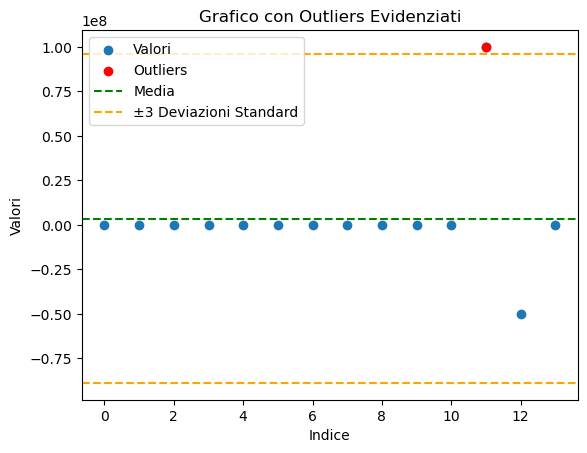

In [21]:
# Creiamo un grafico a dispersione per visualizzare i nostri dati.
plt.scatter(df.index, df['Valori'], label='Valori')

# Ora aggiungiamo i punti degli outliers al grafico, colorandoli di rosso.
plt.scatter(outliers.index, outliers['Valori'], color='red', label='Outliers')

# Vediamo dove si trovano la media e le deviazioni standard.
plt.axhline(y=mean_value, color='green', linestyle='--', label='Media')
plt.axhline(y=mean_value + 3 * std_dev, color='orange', linestyle='--', label='+ o - 3 Deviazioni Standard')
plt.axhline(y=mean_value - 3 * std_dev, color='orange', linestyle='--')

# Aggiungiamo etichette e una legenda per rendere il grafico piu comprensibile.
plt.xlabel('Indice')
plt.ylabel('Valori')
plt.title('Grafico con Outliers Evidenziati')
plt.legend()

# Mostriamo il grafico.
plt.show()

<font size = "+1" face="Lato">
    
Il codice crea un DataFrame di esempio con 4 feature numeriche. Successivamente, imposta il numero minimo di feature che devono superare una certa soglia per considerare un dato come un outlier. Viene definito un intervallo di confidenza (k=3).
Dopodiché, per ogni feature, calcola la media e la deviazione standard. Gli outliers vengono identificati per ciascuna feature basandosi sull'intervallo di confidenza definito. Gli outliers vengono registrati nel DataFrame originale aggiungendo colonne aggiuntive denominati "Outlier_" seguiti dal nome della feature. Infine, il DataFrame viene visualizzato per mostrare le colonne aggiuntive per gli outliers.
</font>

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Creiamo un DataFrame di esempio con 4 feature
data = {'Feature1': [1, 200, 3, 4, 50000, 10, 15, 20, 2500000, 300000000, 100000000],
        'Feature2': [2, 4, 6, 8, 10, 20, 30, 40, 500, 60, 200],
        'Feature3': [5, 10, 15, 20000, 25, 50, 75, 100, 125, 150, 500000],
        'Feature4': [1, -200000, 3, 4000000000, 5, 10, 15, 20, 200, 30, 10000]}
df = pd.DataFrame(data)

# Impostiamo il numero minimo di feature che devono superare la soglia per considerare un dato un outlier
min_features_threshold = 1
k = 3  # Intervallo di confidenza

# Lista per salvare gli indici degli outliers
outlier_indices = []

# Iteriamo su ogni feature per identificare gli outliers
for feature in df.columns:
    # Calcoliamo la media e la deviazione standard per la feature corrente
    mean_value = df[feature].mean()
    std_dev = df[feature].std()    

    # Identifichiamo gli outliers per ciascuna feature basandoci su un intervallo di confidenza
    df['Outlier_' + feature] = (df[feature] > mean_value + k * std_dev) | (df[feature] < mean_value - k * std_dev)

# Visualizziamo il DataFrame con le colonne aggiuntive per gli outliers
df

,Feature1,Feature2,Feature3,Feature4,Outlier_Feature1,Outlier_Feature2,Outlier_Feature3,Outlier_Feature4
0,1,2,5,1,False,False,False,False
1,200,4,10,-200000,False,False,False,False
2,3,6,15,3,False,False,False,False
3,4,8,20000,4000000000,False,False,False,True
4,50000,10,25,5,False,False,False,False
5,10,20,50,10,False,False,False,False
6,15,30,75,15,False,False,False,False
7,20,40,100,20,False,False,False,False
8,2500000,500,125,200,False,False,False,False
9,300000000,60,150,30,False,False,False,False


<font size = "+1" face="Lato">
    
Il codice calcola il numero di feature che superano la soglia per ogni riga del DataFrame. Per fare ciò, somma il valore booleano di ciascuna feature che indica se è un outlier. Viene quindi creata una nuova colonna nel DataFrame chiamata "Num_Outliers", che indica quanti outliers ci sono in ogni riga. Il DataFrame viene quindi visualizzato per mostrare la nuova colonna aggiunta.
<font>

In [24]:
# Ora calcoliamo il numero di features che superano la soglia per ogni riga.
# Per fare questo, sommiamo il valore booleano di ciascuna feature che indica se e' un outlier.
df['Num_Outliers'] = df.filter(like='Outlier_').sum(axis=1)

# Ora il nostro DataFrame ha una nuova colonna chiamata "Num_Outliers" che indica quanti outliers ci sono in ogni riga.
df

,Feature1,Feature2,Feature3,Feature4,Outlier_Feature1,Outlier_Feature2,Outlier_Feature3,Outlier_Feature4,Num_Outliers
0,1,2,5,1,False,False,False,False,0
1,200,4,10,-200000,False,False,False,False,0
2,3,6,15,3,False,False,False,False,0
3,4,8,20000,4000000000,False,False,False,True,1
4,50000,10,25,5,False,False,False,False,0
5,10,20,50,10,False,False,False,False,0
6,15,30,75,15,False,False,False,False,0
7,20,40,100,20,False,False,False,False,0
8,2500000,500,125,200,False,False,False,False,0
9,300000000,60,150,30,False,False,False,False,0


<font size = "+1" face="Lato">
Il codice filtra i dati per mantenere solo le righe che hanno almeno un numero minimo di feature che superano la soglia degli outliers. In altre parole, vengono mantenute le righe che hanno almeno il numero specificato di feature contrassegnate come outliers. Il nuovo DataFrame ottenuto contiene solo le righe che soddisfano questo criterio.
    <font>

In [25]:
# Ora filtriamo i dati per mantenere solo le righe che hanno almeno il numero minimo di feature che superano la soglia
# Questo significa che le righe che hanno almeno "min_features_threshold" feature contrassegnate come outliers vengono mantenute.
outliers = df[df['Num_Outliers'] >= min_features_threshold]

# Ecco il nostro nuovo DataFrame contenente solo le righe con abbastanza outliers!
outliers

,Feature1,Feature2,Feature3,Feature4,Outlier_Feature1,Outlier_Feature2,Outlier_Feature3,Outlier_Feature4,Num_Outliers
3,4,8,20000,4000000000,False,False,False,True,1
10,100000000,200,500000,10000,False,False,True,False,1


<font size = "+1" face="Lato">
    Il codice aggiunge una colonna al DataFrame che indica se ciascuna riga è un outlier o meno. Utilizzando il DataFrame "outliers" creato precedentemente, controlla se ciascuna riga è presente tra gli outliers e assegna un valore booleano di vero o falso alla nuova colonna "Is_Outlier". Successivamente, rimuove le colonne temporanee create durante la ricerca degli outliers, lasciando solo le informazioni essenziali nel DataFrame.
 <font>

In [26]:
# Ora aggiungiamo una colonna che indica se il record e' un outlier o meno.
# Utilizziamo il DataFrame "outliers" che abbiamo creato precedentemente per controllare se un record e' presente tra gli outliers.
df['Is_Outlier'] = df.index.isin(outliers.index)

# Ora che abbiamo segnato i record come outlier o non-outlier, possiamo rimuovere le colonne temporanee create durante la ricerca degli outliers.
# Questo ci lascia con solo le informazioni essenziali nel DataFrame.
df.drop(df.filter(like='Outlier_').columns, axis=1, inplace=True)  # Rimuoviamo le colonne utilizzate temporaneamente per individuare gli outliers
df.drop('Num_Outliers', axis=1, inplace=True)  # Rimuoviamo anche la colonna di conteggio degli outliers

# Ecco il nostro DataFrame finale, pulito e pronto per l'analisi!
df

,Feature1,Feature2,Feature3,Feature4,Is_Outlier
0,1,2,5,1,False
1,200,4,10,-200000,False
2,3,6,15,3,False
3,4,8,20000,4000000000,True
4,50000,10,25,5,False
5,10,20,50,10,False
6,15,30,75,15,False
7,20,40,100,20,False
8,2500000,500,125,200,False
9,300000000,60,150,30,False


<font size = "+1" face="Lato">
    
Il codice organizza i grafici in una matrice con una colonna e 4 righe. Prima determina il numero di feature nel DataFrame, escludendo la colonna 'Is_Outlier'. Quindi, crea una figura di dimensioni adeguate per la matrice di grafici. Successivamente, itera su ogni feature nel DataFrame, escludendo la colonna 'Is_Outlier', e crea un subplot nella matrice di grafici. Disegna un grafico a dispersione per la feature corrente, utilizzando il colore rosso per gli outliers e una mappa di colori 'coolwarm'. Aggiunge titolo, etichette degli assi e personalizza il grafico. Infine, regola il layout della matrice di grafici per evitare sovrapposizioni e mostra la matrice di grafici.
 <font>

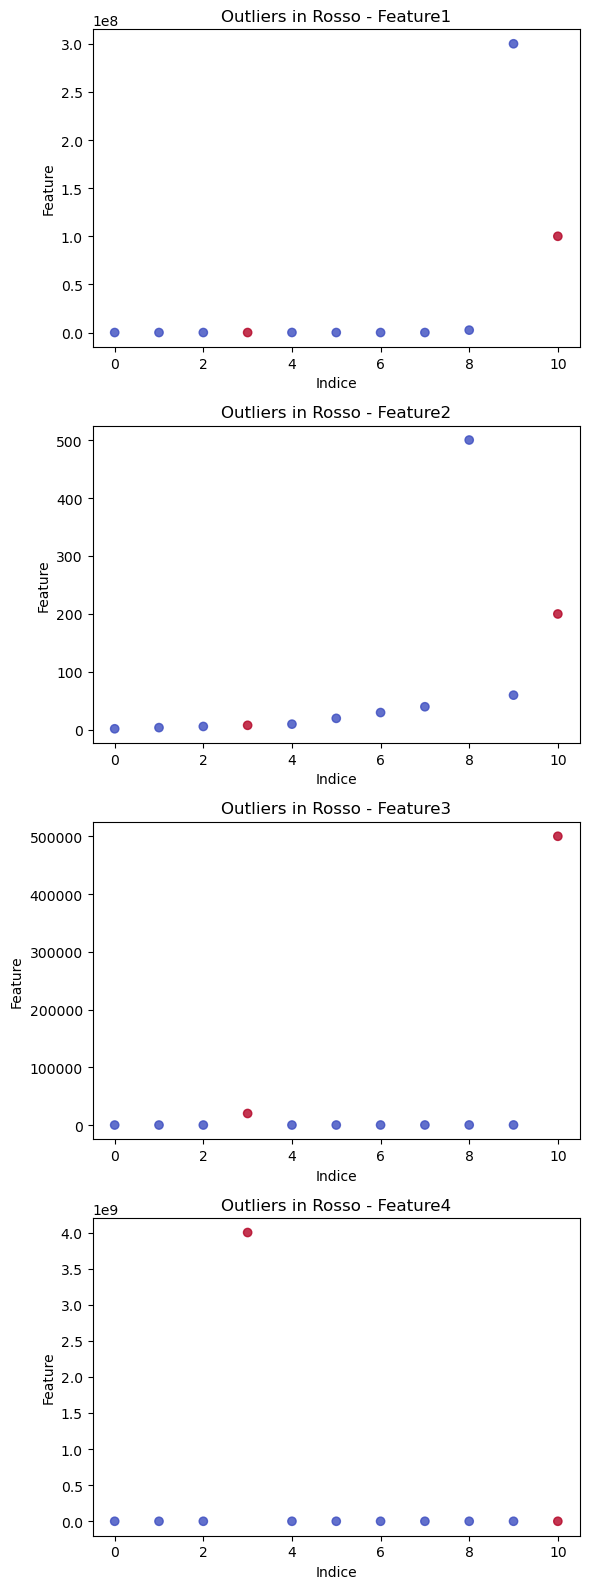

In [27]:
# Organizziamo i grafici in una matrice, con una colonna e 4 righe.
# Determiniamo il numero di feature nel DataFrame, escludendo la colonna 'Is_Outlier'.
num_features = len(df.columns) - 1
num_rows = num_features
num_cols = 1  # Una colonna per la matrice di grafici

# Creiamo una figura di dimensioni adeguate per la matrice di grafici.
plt.figure(figsize=(6, 4 * num_rows))

# Iteriamo su ogni feature nel DataFrame.
for i, feature in enumerate(df.columns[:-1]):  # Escludiamo la colonna 'Is_Outlier'.
    # Creiamo un subplot nella matrice di grafici.
    plt.subplot(num_rows, num_cols, i + 1)
    
    # Disegniamo il grafico a dispersione per la feature corrente.
    # Usiamo il colore rosso per gli outliers e una mappa di colori 'coolwarm'.
    plt.scatter(df.index, df[feature], c=df['Is_Outlier'], cmap='coolwarm', alpha=0.8)
    
    # Aggiungiamo titolo, etichette degli assi e personalizziamo il grafico.
    plt.title(f'Outliers in Rosso - {feature}')
    plt.xlabel('Indice')
    plt.ylabel('Feature')

# Regoliamo il layout della matrice di grafici per evitare sovrapposizioni.
plt.tight_layout()

# Mostriamo la matrice di grafici.
plt.show()

<font size = "+1" face="Lato">
    
Il codice elimina le righe corrispondenti agli outliers e a quelli che hanno almeno una feature fuoriscala. Viene creato un nuovo DataFrame filtrando quello originale, mantenendo solo le righe in cui la colonna 'Is_Outlier' è False, il che significa che non sono outliers. Il risultato è un DataFrame filtrato, privo delle righe che contenevano outliers o feature fuoriscala.
 <font>

In [28]:
# Ora eliminiamo le righe corrispondenti agli outliers e quelli che hanno almeno una feature fuoriscala.
# Creiamo un nuovo DataFrame filtrando il DataFrame originale.
# Manteniamo solo le righe in cui la colonna 'Is_Outlier' e' False, il che significa che non sono outlier.
df_filtered = df[df['Is_Outlier'] == False]

# Ecco il nostro DataFrame filtrato, senza le righe che contenevano outliers o feature fuoriscala.
df_filtered

,Feature1,Feature2,Feature3,Feature4,Is_Outlier
0,1,2,5,1,False
1,200,4,10,-200000,False
2,3,6,15,3,False
4,50000,10,25,5,False
5,10,20,50,10,False
6,15,30,75,15,False
7,20,40,100,20,False
8,2500000,500,125,200,False
9,300000000,60,150,30,False


<font size = "+1" face="Lato">
    La funzione calcola_deviazione_standard calcola la deviazione standard di una lista di numeri. Per farlo, trova il numero di elementi nella lista, calcola la media dei numeri nella lista, quindi calcola la somma dei quadrati delle differenze tra ciascun numero e la media. Infine, calcola la deviazione standard come la radice quadrata della media dei quadrati delle differenze e restituisce il risultato.

Nell'esempio di utilizzo della funzione, viene definita una lista di numeri numero_lista. Viene quindi chiamata la funzione calcola_deviazione_standard con questa lista e il risultato viene stampato
    
  <font>

In [29]:
def calcola_deviazione_standard(lista):
    # Calcola la deviazione standard di una lista di numeri
    
    # Trova il numero di elementi nella lista
    n = len(lista)
    
    # Calcola la media dei numeri nella lista
    media = sum(lista) / n
    
    # Calcola la somma dei quadrati delle differenze tra ciascun numero e la media
    somma_quadrati_diff = sum((x - media) ** 2 for x in lista)
    
    # Calcola la deviazione standard come la radice quadrata della media dei quadrati delle differenze
    deviazione_standard = (somma_quadrati_diff / n) ** 0.5
    
    # Restituisce la deviazione standard calcolata
    return deviazione_standard

# Esempio di utilizzo della funzione con una lista di numeri
numero_lista = [1, 2, 3, 4, 50]
deviazione_standard = calcola_deviazione_standard(numero_lista)

# Stampa il risultato
print(f"La deviazione standard della lista e' : {deviazione_standard}")

La deviazione standard della lista �: 19.026297590440446


<h3 align="center" style="font-size:40px; font-family:'Helvetica Neue', sans-serif; color: #2a9d8f; text-shadow: 2px 2px 4px #264653; letter-spacing: 1px; margin-top: 20px; margin-bottom: 20px;">
    TRAIN & TEST SET
</h3>


<font size = "+1" face="Lato">
Questo codice utilizza la libreria pandas per caricare i dati contenuti in un file CSV che descrive i Pokemon. Inizialmente, viene definito il percorso del file CSV da leggere. Successivamente, viene utilizzato il metodo read_csv() di pandas per leggere il file CSV e caricare i dati in un DataFrame chiamato df. Questo DataFrame contiene tutte le informazioni sui Pokemon presenti nel file CSV. La descrizione dei Pokemon viene mostrata visualizzando il contenuto del DataFrame.
</font>

In [25]:
import pandas as pd

# Definiamo il percorso del file CSV da leggere
percorso_file_csv = r"C:\Users\zkpow\Downloads\pokemons.csv"

# Leggiamo il file CSV utilizzando Pandas e carichiamo i dati in un DataFrame
df = pd.read_csv(percorso_file_csv)

# Ora che abbiamo caricato i dati, mostriamoli nel DataFrame
df

,id,name,rank,generation,evolves_from,type1,type2,hp,atk,def,spatk,spdef,speed,total,height,weight,abilities,desc
0,1,bulbasaur,ordinary,generation-i,nothing,grass,poison,45,49,49,65,65,45,318,7,69,overgrow chlorophyll,A strange seed was planted on its back at birt...
1,2,ivysaur,ordinary,generation-i,bulbasaur,grass,poison,60,62,63,80,80,60,405,10,130,overgrow chlorophyll,"When the bulb on its back grows large, it appe..."
2,3,venusaur,ordinary,generation-i,ivysaur,grass,poison,80,82,83,100,100,80,525,20,1000,overgrow chlorophyll,The plant blooms when it is absorbing solar en...
3,4,charmander,ordinary,generation-i,nothing,fire,None,39,52,43,60,50,65,309,6,85,blaze solar-power,"Obviously prefers hot places. When it rains, s..."
4,5,charmeleon,ordinary,generation-i,charmander,fire,None,58,64,58,80,65,80,405,11,190,blaze solar-power,"When it swings its burning tail, it elevates t..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1012,1013,sinistcha,ordinary,generation-ix,poltchageist,grass,ghost,71,60,106,121,80,70,508,2,22,hospitality heatproof,Not Available
1013,1014,okidogi,legendary,generation-ix,nothing,poison,fighting,88,128,115,58,86,80,555,18,922,toxic-chain zero-to-hero,Not Available
1014,1015,munkidori,legendary,generation-ix,nothing,poison,psychic,88,75,66,130,90,106,555,10,122,toxic-chain frisk,Not Available
1015,1016,fezandipiti,legendary,generation-ix,nothing,poison,fairy,88,91,82,70,125,99,555,14,301,toxic-chain technician,Not Available


<font size = "+1" face="Lato">
    Questo codice utilizza la libreria os per navigare nella struttura delle cartelle e la libreria pandas per leggere i file CSV. Inizialmente, viene creata una lista vuota chiamata lista_dataframes per conservare i DataFrame. Viene quindi specificato il percorso della cartella che contiene i file CSV. Successivamente, viene iterato su ogni file nella cartella specificata. Se il file corrente ha estensione ".csv", il suo percorso completo viene costruito e il file CSV viene caricato in un DataFrame utilizzando pd.read_csv(). Infine, il DataFrame caricato viene aggiunto alla lista lista_dataframes. Alla fine del processo, lista_dataframes conterra' tutti i DataFrame corrispondenti ai file CSV presenti nella cartella specificata
</font>

In [26]:
import os
import pandas as pd

lista_dataframes = []  # Creiamo una lista vuota per conservare i DataFrame

# Specifica il percorso della cartella che contiene i file CSV
percorso_cartella = r"C:\Users\zkpow\Downloads\serieAnuovo"

# Iteriamo su ogni file nella cartella specificata
for nome_file in os.listdir(percorso_cartella):
    # Controlliamo se il file corrente e' un file CSV
    if nome_file.endswith(".csv"):
        # Costruiamo il percorso completo al file CSV
        percorso_file_csv = os.path.join(percorso_cartella, nome_file)
        # Carichiamo il file CSV in un DataFrame di Pandas
        df = pd.read_csv(percorso_file_csv)
        # Aggiungiamo il DataFrame alla lista
        lista_dataframes.append(df)

<font size = "+1" face="Lato">
    Questo codice utilizza NumPy e scikit-learn per generare un set di dati simulati di altezze e pesi. Inizialmente, vengono generate 100 altezze casuali utilizzando una distribuzione normale con media 160 e deviazione standard 10. I pesi sono quindi calcolati come una funzione lineare delle altezze con un'aggiunta casuale di variazione. Successivamente, il set di dati viene diviso in un training set e un test set utilizzando il metodo train_test_split di scikit-learn. La dimensione del test set e' il 30% del set di dati totale, e il seed viene impostato su 42 per rendere i risultati riproducibili. Infine, le dimensioni dei set di addestramento e di test vengono stampate
</font>

In [28]:
import numpy as np
from sklearn.model_selection import train_test_split

# Impostiamo il seed per rendere i risultati riproducibili
np.random.seed(0) 

# Generiamo un set di dati di altezze e pesi
altezze = np.random.normal(160, 10, 100)  # Generiamo 100 altezze casuali con una media di 160 e deviazione standard di 10
pesi = 0.5 * altezze + np.random.normal(0, 5, 100)  # I pesi sono correlati alle altezze con una variazione aggiuntiva

# Dividiamo il dataset in training set e test set
x_train, x_test, y_train, y_test = train_test_split(altezze, pesi, test_size=0.3, random_state=42)

# Stampiamo le dimensioni dei set di addestramento e di test
print("Dimensione del training set:", x_train.shape, y_train.shape)
print("Dimensione del test set:", x_test.shape, y_test.shape)

Dimensione del training set: (70,) (70,)
Dimensione del test set: (30,) (30,)


<font size = "+1" face="Lato">
    Il codice genera dati casuali per il numero di visite al sito web e l'importo delle vendite, utilizzando NumPy per la generazione dei dati. Viene impostato un seed per rendere la generazione dei dati riproducibile. Successivamente, il dataset viene diviso in un training set (70%) e un test set (30%) utilizzando il metodo train_test_split di scikit-learn. Il seed viene impostato su 42 per garantire la riproducibilita' della divisione dei dati. Dopodiche', viene creato un grafico a dispersione per visualizzare la relazione tra il numero di visite al sito e l'importo delle vendite, con il training set rappresentato in blu e il test set in arancione. Infine, le dimensioni dei training set e dei test set vengono stampate
</font>

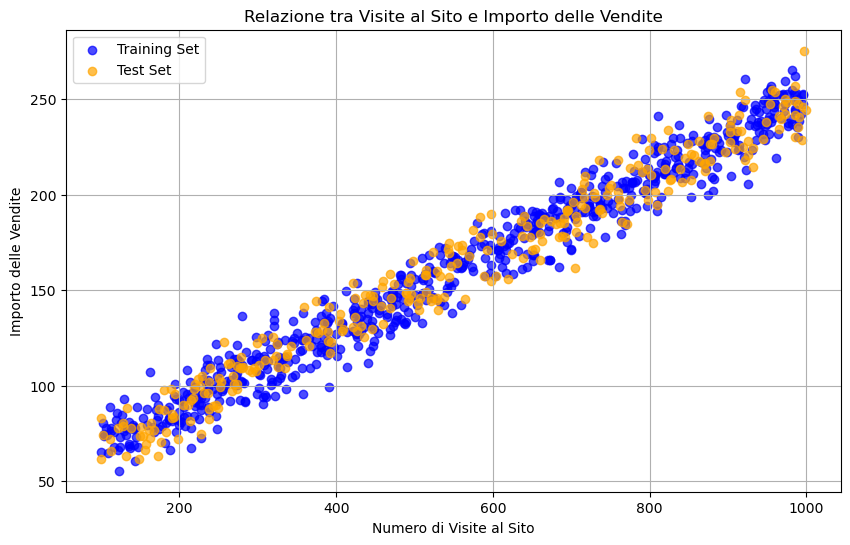

Dimensioni del Training Set (visite al sito e importo delle vendite): (700,) (700,)
Dimensioni del Test Set (visite al sito e importo delle vendite): (300,) (300,)


In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Generiamo dati casuali per il numero di visite al sito web e l'importo delle vendite
np.random.seed(0)
visite_al_sito = np.random.randint(100, 1000, 1000)  # Generiamo 1000 visite casuali al sito
importo_vendite = 50 + 0.2 * visite_al_sito + np.random.normal(0, 10, 1000)  # Calcoliamo l'importo delle vendite correlato al numero di visite

# Dividiamo il dataset in training set (70%) e test set (30%), impostando il seed per rendere la divisione riproducibile
X_train, X_test, y_train, y_test = train_test_split(visite_al_sito, importo_vendite, test_size=0.3, random_state=42)

# Creiamo un grafico a dispersione per visualizzare la relazione tra visite al sito e importo delle vendite
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, label='Training Set', color='blue', alpha=0.7)
plt.scatter(X_test, y_test, label='Test Set', color='orange', alpha=0.7)
plt.xlabel('Numero di Visite al Sito')
plt.ylabel('Importo delle Vendite')
plt.title('Relazione tra Visite al Sito e Importo delle Vendite')
plt.legend()
plt.grid(True)
plt.show()

# Stampiamo le dimensioni dei training set e test set
print("Dimensioni del Training Set (visite al sito e importo delle vendite):", X_train.shape, y_train.shape)
print("Dimensioni del Test Set (visite al sito e importo delle vendite):", X_test.shape, y_test.shape)

<font size = "+1" face="Lato">
    Il codice genera dati simulati relativi ai mesi trascorsi e al peso corporeo corrispondente. Viene impostato un seed per rendere i risultati riproducibili. Successivamente, il dataset viene diviso in un training set (75%) e un test set (25%) utilizzando il metodo train_test_split di scikit-learn. Il seed viene impostato su 42 per garantire la riproducibilita' della divisione dei dati. Viene quindi creato un grafico per visualizzare i dati, con i punti del training set rappresentati in blu e quelli del test set in arancione. Infine, le dimensioni dei training set e dei test set vengono stampate






</font>

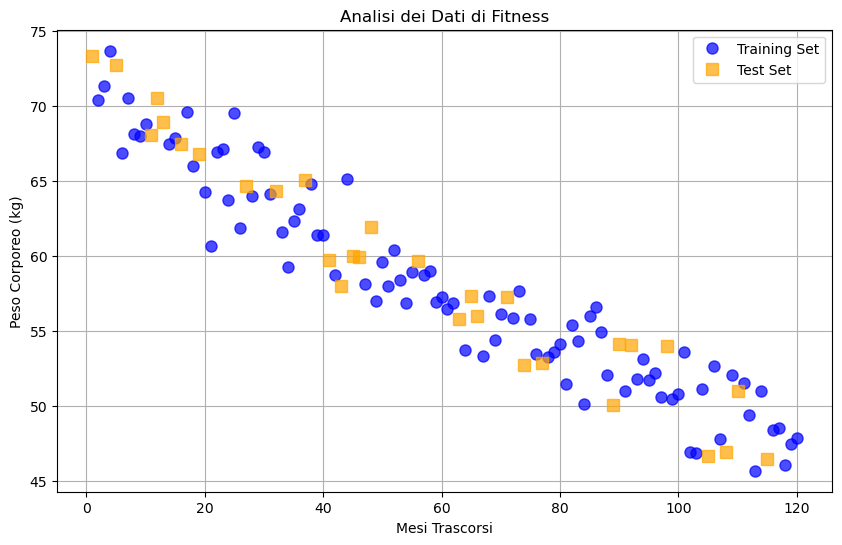

Dimensioni del Training Set (mesi trascorsi e peso corporeo): (90,) (90,)
Dimensioni del Test Set (mesi trascorsi e peso corporeo): (30,) (30,)


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Impostiamo il seed per rendere i risultati riproducibili
np.random.seed(0)

# Definiamo il numero totale di punti dati
n = 120  

# Generiamo i dati: mesi trascorsi e peso corporeo corrispondente
mesi_trascorsi = np.arange(1, n+1)  # Array da 1 a 120 (mesi)
peso_corporeo = 70 - 0.2 * mesi_trascorsi + np.random.normal(0, 2, n)  # Peso corporeo con una tendenza decrescente e variazione casuale

# Dividiamo i dati in training set (75%) e test set (25%)
X_train, X_test, y_train, y_test = train_test_split(mesi_trascorsi, peso_corporeo, test_size=0.25, random_state=42)

# Creiamo un grafico a dispersione per visualizzare i dati
plt.figure(figsize=(10, 6))
plt.plot(X_train, y_train, label='Training Set', marker='o', color='blue', linestyle='', markersize=8, alpha=0.7)  # Grafico per il training set
plt.plot(X_test, y_test, label='Test Set', marker='s', color='orange', linestyle='', markersize=8, alpha=0.7)  # Grafico per il test set
plt.xlabel('Mesi Trascorsi')  # Etichetta asse x
plt.ylabel('Peso Corporeo (kg)')  # Etichetta asse y
plt.title('Analisi dei Dati di Fitness')  # Titolo del grafico
plt.legend()  # Aggiunta della legenda
plt.grid(True)  # Attivazione della griglia sul grafico
plt.show()  # Visualizzazione del grafico

# Stampiamo le dimensioni dei set di addestramento e test
print("Dimensioni del Training Set (mesi trascorsi e peso corporeo):", X_train.shape, y_train.shape)
print("Dimensioni del Test Set (mesi trascorsi e peso corporeo):", X_test.shape, y_test.shape)

<font size = "+1" face="Lato">
    Il codice genera casualmente un set di dati con 100 campioni e 2 feature utilizzando NumPy. Le etichette di classe sono generate casualmente come 'A' o 'B'. Successivamente, il seed viene impostato su 1 per garantire la riproducibilita' dei risultati. Vengono calcolate le proporzioni delle classi 'A' e 'B' nel dataset completo. Il dataset viene quindi diviso in un training set (70%) e un test set (30%) utilizzando il metodo train_test_split di scikit-learn. Il seed viene impostato su 42 per garantire la riproducibilita' della divisione dei dati. Infine, vengono calcolate le proporzioni delle classi 'A' e 'B' nel test set e stampate insieme alle proporzioni nel dataset completo.
</font>

In [31]:
import numpy as np
from sklearn.model_selection import train_test_split

# Generiamo casualmente un set di dati X con 100 campioni e 2 feature
X = np.random.rand(100, 2)

# Generiamo casualmente le etichette di classe 'A' o 'B'
Y = np.random.choice(['A', 'B'], size=100)

# Impostiamo il seed per rendere i risultati riproducibili
np.random.seed(1)

# Calcoliamo la proporzione della classe 'A' nel dataset completo
proporzione_classe_A = sum(Y == 'A') / len(Y)

# Calcoliamo la proporzione della classe 'B' nel dataset completo
proporzione_classe_B = 1 - proporzione_classe_A

# Suddividiamo il dataset in set di addestramento (70%) e set di test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Calcoliamo la proporzione della classe 'A' nel test set
proporzione_classe_A_train = sum(y_test == 'A') / len(y_test)

# Calcoliamo la proporzione della classe 'B' nel test set
proporzione_classe_B_train = 1 - proporzione_classe_A_train

# Stampiamo le proporzioni delle classi nei diversi set
print("Proporzione della classe 'A' nel dataset completo: ", proporzione_classe_A)
print("Proporzione della classe 'B' nel dataset completo: ", proporzione_classe_B)
print("Proporzione della classe 'A' nel training set: ", proporzione_classe_B_train)
print("Proporzione della classe 'B' nel training set: ", proporzione_classe_A_train)

Proporzione della classe 'A' nel dataset completo:  0.52
Proporzione della classe 'B' nel dataset completo:  0.48
Proporzione della classe 'A' nel training set:  0.5
Proporzione della classe 'B' nel training set:  0.5


<font size = "+1" face="Lato">
    Il codice genera casualmente un set di dati X con 100 campioni e 2 feature, insieme a un set di etichette Y. Le etichette sono selezionate casualmente come 'A' o 'B'. Viene impostato un seed su 1 per garantire la riproducibilita' dei risultati. Vengono calcolate le proporzioni delle classi 'A' e 'B' nel dataset completo. Il dataset viene quindi diviso in un training set (70%) e un test set (30%) utilizzando il metodo train_test_split di scikit-learn, con un seed impostato su 42 per garantire la riproducibilita' della divisione dei dati. Vengono quindi calcolate le proporzioni delle classi 'A' e 'B' nel test set e stampate  insieme alle proporzioni nel training set.
</font>

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split

# Generazione di un set di dati X con 100 campioni e 2 feature, e un set di etichette Y
X = np.random.rand(100, 2)
Y = np.random.choice(['A', 'B'], size=100)

# Impostazione del seed per la riproducibilita'
np.random.seed(1)

# Calcolo della proporzione della classe 'A' nel dataset completo
proporzione_classe_A = sum(Y == 'A') / len(Y)

# Calcolo della proporzione della classe 'B' nel dataset completo
proporzione_classe_B = 1 - proporzione_classe_A

# Suddivisione del dataset in training set (70%) e test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Calcolo della proporzione della classe 'A' nel test set
proporzione_classe_A_test = sum(y_test == 'A') / len(y_test)
# Calcolo della proporzione della classe 'B' nel test set
proporzione_classe_B_test = 1 - proporzione_classe_A_test

# Calcolo delle proporzioni nel training set
proporzione_classe_A_train = sum(y_train == 'A') / len(y_train)
proporzione_classe_B_train = 1 - proporzione_classe_A_train

# Stampa delle proporzioni delle classi nei diversi set
print("Proporzione classe A nel data set completo: ", proporzione_classe_A)
print("Proporzione classe B nel data set completo: ", proporzione_classe_B)
print("Proporzione classe A nel test set: ", proporzione_classe_A_test)
print("Proporzione classe B nel test set: ", proporzione_classe_B_test)
# Stampa delle proporzioni nel training set
print("Proporzione classe A nel train set: ", proporzione_classe_A_train)
print("Proporzione classe B nel train set: ", proporzione_classe_B_train)

Proporzione classe A nel data set completo:  0.54
Proporzione classe B nel data set completo:  0.45999999999999996
Proporzione classe A nel test set:  0.5666666666666667
Proporzione classe B nel test set:  0.43333333333333335
Proporzione classe A nel train set:  0.5285714285714286
Proporzione classe B nel train set:  0.4714285714285714


<font size = "+1" face="Lato">
    
Questo codice crea un grafico a torta che mostra la proporzione delle classi nel dataset completo. Le etichette 'Classe A' e 'Classe B' sono definite per le due classi, e i colori 'gold' e 'lightblue' sono assegnati rispettivamente. La funzione plt.pie() viene utilizzata per creare il grafico a torta utilizzando le proporzioni delle classi calcolate in precedenza. L'opzione autopct='%1.1f%%' aggiunge le percentuali alle fette del grafico. Infine, viene aggiunto un titolo al grafico utilizzando plt.title() e il grafico viene mostrato con plt.show()
</font>

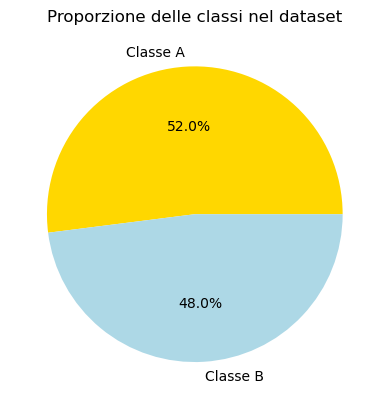

In [32]:
import matplotlib.pyplot as plt

# Definiamo le etichette e i colori per il grafico a torta
labels = ['Classe A', 'Classe B']
colors = ['gold', 'lightblue']

# Creiamo il grafico a torta con le proporzioni delle classi
plt.pie([proporzione_classe_A, proporzione_classe_B], labels=labels, colors=colors, autopct='%1.1f%%')

# Aggiungiamo un titolo al grafico
plt.title('Proporzione delle classi nel dataset')

# Mostriamo il grafico
plt.show()

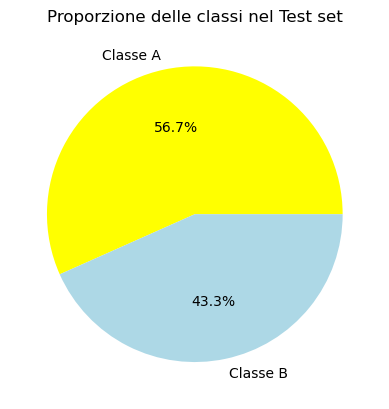

In [33]:
import matplotlib.pyplot as plt

# Definiamo le etichette e i colori per il grafico a torta
labels = ['Classe A', 'Classe B']
colors = ['yellow', 'lightblue']

# Creiamo il grafico a torta con le proporzioni delle classi nel test set
plt.pie([proporzione_classe_A_test, proporzione_classe_B_test], labels=labels, colors=colors, autopct='%1.1f%%')

# Aggiungiamo un titolo al grafico
plt.title('Proporzione delle classi nel Test set')

# Mostriamo il grafico
plt.show()

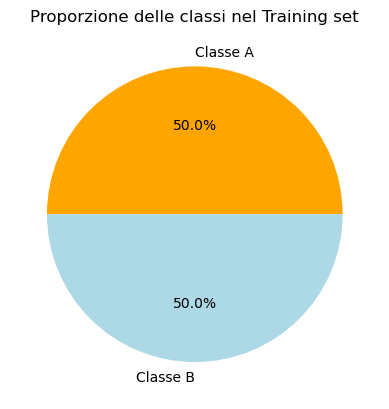

In [34]:
import matplotlib.pyplot as plt

# Definiamo le etichette e i colori per il grafico a torta
labels = ['Classe A', 'Classe B']
colors = ['orange', 'lightblue']

# Creiamo il grafico a torta con le proporzioni delle classi nel training set
plt.pie([proporzione_classe_A_train, proporzione_classe_B_train], labels=labels, colors=colors, autopct='%1.1f%%')

# Aggiungiamo un titolo al grafico
plt.title('Proporzione delle classi nel Training set')

# Mostriamo il grafico
plt.show()

<font size = "+1" face="Lato">
    Questo codice crea un dataset di 1000 elementi contenenti numeri interi casuali compresi tra 1 e 100. Successivamente, viene estratto un campione casuale di 300 elementi dal dataset. Utilizzando la libreria NumPy, calcoliamo la media e la deviazione standard di entrambi il campione e l'intero dataset. Infine, stampiamo i risultati ottenuti, inclusi la media e la deviazione standard del campione casuale e del dataset completo. La media rappresenta il valore centrale dei dati, mentre la deviazione standard misura la dispersione dei dati attorno alla media
</font>

In [35]:
import random
import numpy as np

dataset = []

# Creiamo un dataset di 1000 elementi con numeri interi casuali compresi tra 1 e 100
for i in range(1000):
    dataset.append(random.randint(1, 100))

# Estraiamo uan campione casuale semplice di 300 elementi dal dataset
campione_casuale = random.sample(dataset, 300)

# Calcoliamo la media e la deviazione standard del campione
media_campione = np.mean(campione_casuale)
deviazione_standard_campione = np.std(campione_casuale)

# Calcoliamo la media e la deviazione standard del dataset completo
media_dataset = np.mean(dataset)
deviazione_standard_dataset = np.std(dataset)

# Stampiamo i risultati
print(f"Media del campione casuale: {media_campione:.2f}")
print(f"Deviazione standard del campione casuale: {deviazione_standard_campione:.2f}")
print(f"Media del dataset completo: {media_dataset:.2f}")
print(f"Deviazione standard del dataset completo: {deviazione_standard_dataset:.2f}")

Media del campione casuale: 50.28
Deviazione standard del campione casuale: 28.78
Media del dataset completo: 50.41
Deviazione standard del dataset completo: 28.09


<font size = "+1" face="Lato">
Questo codice utilizza la libreria pandas e numpy per creare un DataFrame df contenente una colonna chiamata 'ColonnaAB'. La colonna contiene valori casuali 'A' e 'B' generati in base alla percentuale specificata (percentuale_A). La dimensione della colonna e' definita dal numero di elementi num_elementi. Infine, il DataFrame viene stampato 
</font>

In [36]:
import pandas as pd
import numpy as np

np.random.seed(42)

# Definiamo il numero di elementi e la percentuale per la colonna 'A'
num_elementi = 1000
percentuale_A = 0.7

# Creiamo la colonna con valori casuali 'A' e 'B' in base alla percentuale specificata
colonna = np.random.choice(['A', 'B'], size=num_elementi, p=[percentuale_A, 1 - percentuale_A])

# Creiamo il DataFrame
df = pd.DataFrame({'ColonnaAB': colonna})

# Stampiamo il DataFrame
print(df)

    ColonnaAB
0           A
1           B
2           B
3           A
4           A
..        ...
995         A
996         B
997         A
998         B
999         A

[1000 rows x 1 columns]


<font size = "+1" face="Lato">
    il codice genera un dataset di 1000 elementi contenenti numeri interi casuali compresi tra 1 e 100. Successivamente, crea un DataFrame utilizzando il modulo pandas, inserendo i dati casuali all'interno. Poi, seleziona tre sottoinsiemi casuali del DataFrame, ognuno contenente un terzo delle righe totali. Per fare cio', utilizza il metodo sample di pandas per selezionare un sottoinsieme casuale del DataFrame, specificando la frazione desiderata tramite il parametro frac. Poiche' la selezione del secondo sottoinsieme deve avvenire dalle righe rimanenti dopo la selezione del primo sottoinsieme, le righe corrispondenti al primo sottoinsieme vengono rimosse prima di selezionare il secondo sottoinsieme utilizzando il metodo drop. Il DataFrame rimanente contiene le righe che non sono state selezionate nei primi due sottoinsiemi. Infine, i tre sottoinsiemi vengono stampati
</font>

In [41]:
import pandas as pd
import random

# Creiamo un dataset di 1000 elementi con numeri interi casuali compresi tra 1 e 100
dataset = [random.randint(1, 100) for _ in range(1000)]

# Creiamo un DataFrame di esempio
df = pd.DataFrame(dataset)

# Selezioniamo tre sottoinsiemi casuali del DataFrame, ciascuno contenente un terzo delle righe
subset1 = df.sample(frac=1/3)
subset2 = df.drop(subset1.index).sample(frac=1/2) # Poiche' stiamo selezionando un sottoinsieme casuale dalle righe rimanenti dopo la selezione del primo sottoinsieme, 
# dobbiamo utilizzare il metodo drop per rimuovere le righe del primo sottoinsieme prima di selezionare il secondo sottoinsieme

# Il DataFrame df conterra' le righe rimanenti
subset3 = df.drop(subset1.index).drop(subset2.index)

# Stampiamo i subset
print("Subset 1:")
print(subset1)
print("\nSubset 2:")
print(subset2)
print("\nSubset 3:")
print(subset3)

Subset 1:
      0
353  45
370  92
316  91
923  10
251  25
..   ..
859  40
166  29
961  28
233  62
632  32

[333 rows x 1 columns]

Subset 2:
      0
805  57
574  11
91   33
625  70
890  31
..   ..
693  20
191  25
774  11
117  22
258  80

[334 rows x 1 columns]

Subset 3:
      0
1     3
3    68
8    34
9     5
12   35
..   ..
971  13
974  80
985  25
990  79
994  94

[333 rows x 1 columns]


In [9]:
import ipywidgets as widgets
from IPython.display import display, HTML

def create_toggle_section_html(button_description, html_content):
    toggle_button = widgets.Button(description=button_description,
                                   button_style='info')  # Stili: 'success', 'info', 'warning', 'danger' o ''
    output = widgets.Output()
    is_visible = False

    def toggle_content(b):
        nonlocal is_visible
        with output:
            if is_visible:
                output.clear_output()  # Nasconde il contenuto
            else:
                output.clear_output()  # Pulisce il contenuto prima di visualizzare il nuovo
                display(HTML(html_content))
        is_visible = not is_visible

    toggle_button.on_click(toggle_content)
    display(toggle_button, output)

# Esempio di utilizzo della funzione con HTML
create_toggle_section_html("Mostra/Nascondi Dettagli", "<font size='+1' face='Lato'>Questo è il contenuto nascosto con stile HTML specifico.</font>")

Button(button_style='info', description='Mostra/Nascondi Dettagli', style=ButtonStyle())

Output()